In [1]:
import numpy as np
import pandas as pd

In [2]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
    sep= ',', header = None)


balance_data.tail()

,0,1,2,3,4
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4
624,B,5,5,5,5


In [3]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:, 0]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3)

In [6]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [7]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3)
  
# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [8]:
y_pred_gini = clf_gini.predict(X_test)

In [9]:
y_pred_entropy = clf_entropy.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_gini))
      
print ("Accuracy : ",accuracy_score(y_test,y_pred_gini)*100)

Confusion Matrix:  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893


In [12]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_entropy))
      
print ("Accuracy : ",accuracy_score(y_test,y_pred_entropy)*100)

Confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383


In [13]:
y_pred_gini

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

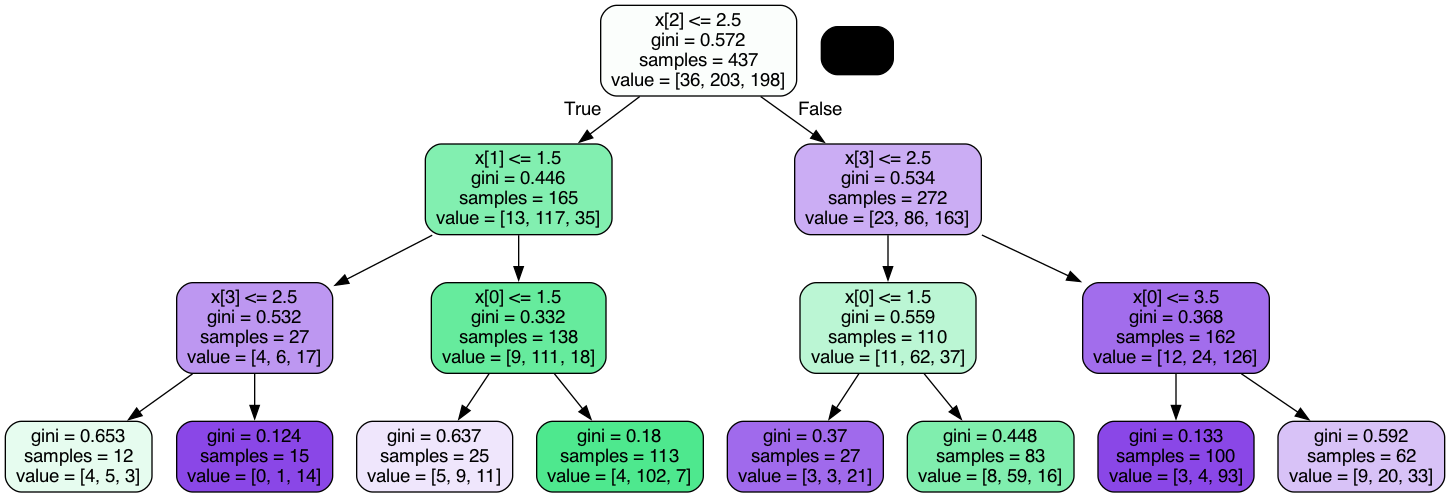

In [14]:
import pydotplus
from IPython.display import Image 
from sklearn.tree import export_graphviz

# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf_gini,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [15]:
clf_entropy.predict([[5,5,5,1]])

array(['L'], dtype=object)

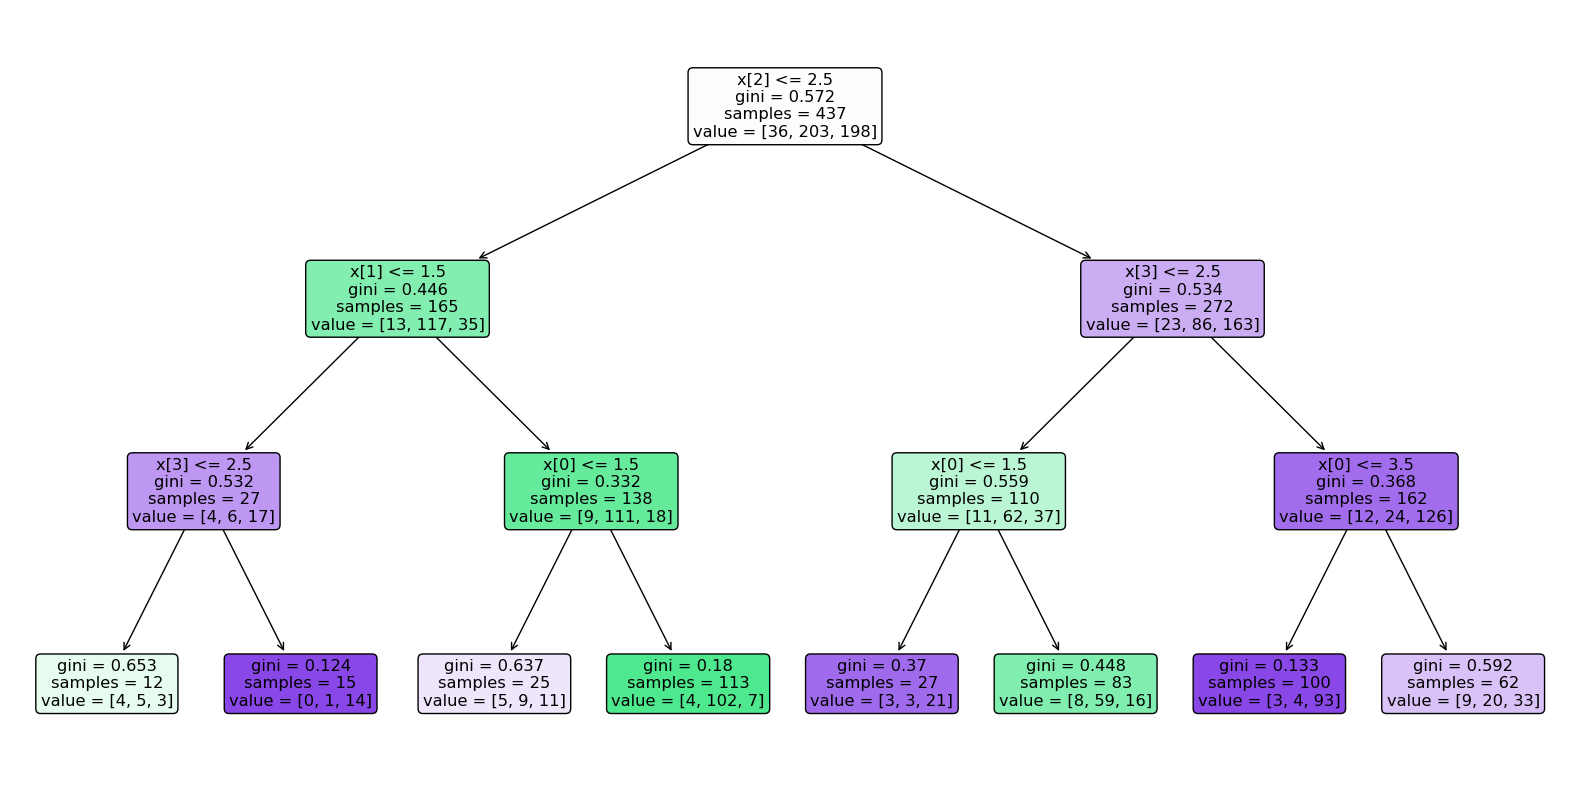

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini,rounded=True,filled=True)
plt.show()